In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
# from scipy.spatial.distance import pdist

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [20]:
df = pd.read_csv('data/movies_to_pca.csv')
df.head(3)

,movieId,title,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0.03950,0.01800,0.04575,0.03275,0.1250,0.04150,0.01925,0.03625,0.07775,0.02300
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0.04175,0.01925,0.01725,0.02425,0.1255,0.02250,0.01550,0.01475,0.09025,0.01875
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0.04150,0.02675,0.02775,0.03425,0.1555,0.03675,0.01700,0.01950,0.09700,0.01850


In [21]:
# Cleaning up data for PCA
df = df.fillna(0)
X = df.drop(columns = ['movieId', 'title'])

In [24]:
X.head(3)

,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,horror_x,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,0,1,1,1,1,0,0,0,1,0,...,0.03950,0.01800,0.04575,0.03275,0.1250,0.04150,0.01925,0.03625,0.07775,0.02300
1,0,1,0,1,0,0,0,0,1,0,...,0.04175,0.01925,0.01725,0.02425,0.1255,0.02250,0.01550,0.01475,0.09025,0.01875
2,0,0,0,0,1,0,0,0,0,0,...,0.04150,0.02675,0.02775,0.03425,0.1555,0.03675,0.01700,0.01950,0.09700,0.01850


In [44]:
# Scale the data
ss = StandardScaler()
ss.fit(X)

X_s = ss.transform(X)

/Users/dmitriy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/dmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [45]:
# Initiating PCA and tranforming the data
pca = PCA()
pca.fit(X_s)

X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca)

In [46]:
X_pca.shape

(27278, 1164)

In [47]:
# Creating column names for the PCA dataframe
X_pca.columns = [f'component {i}' for i in range(1,1165)]

In [48]:
X_pca.head(3)

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,...,component 1155,component 1156,component 1157,component 1158,component 1159,component 1160,component 1161,component 1162,component 1163,component 1164
0,6.155315,1.003415,1.884489,0.162128,1.542543,-1.592334,2.037632,1.027286,1.401541,-0.108377,...,0.093543,0.020271,0.019131,-0.143041,0.099358,0.003613,0.074602,0.338263,2.374017,0.401758
1,4.463010,2.090785,0.978700,0.063590,0.798095,-0.798207,0.853332,-0.120340,0.945498,0.360980,...,0.036765,0.023022,-0.031184,-0.119795,0.024298,0.011860,0.028745,0.297662,1.494762,0.401758
2,3.531236,0.733328,0.381070,-0.732909,0.047286,0.069248,0.467548,0.046613,-0.072457,0.037672,...,-0.010876,-0.002534,0.043342,-0.131857,0.012815,-0.019543,0.098430,0.371079,0.779426,0.401758


In [49]:
len(pca.components_)

1164

In [50]:
len(pca.components_[0])

1164

In [51]:
# Creating a dataframe to take a deeper dive into the PCA components
components = pd.DataFrame(pca.components_,
            columns=X.columns,
            index=[f'component {i}' for i in range(1,1165)])
components.head(3)

,action_x,adventure_x,animation_x,children_x,comedy_x,crime_x,documentary_x,drama_x,fantasy_x,horror_x,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
component 1,0.004554,0.004163,0.001423,0.002026,0.002155,0.002624,-0.005247,0.001308,0.002596,-0.000338,...,0.027654,0.022422,0.015794,0.029669,0.040525,0.033570,0.021234,0.014606,0.029733,0.013521
component 2,0.036725,0.028744,0.010375,0.019259,0.013651,-0.005172,-0.011819,-0.037363,0.016774,0.015552,...,-0.024432,-0.024824,-0.020296,-0.039210,0.003424,-0.016726,-0.000220,-0.020520,0.033264,0.014103
component 3,-0.001375,0.022216,0.014569,0.029553,0.001250,-0.023250,0.007170,0.016504,0.003177,-0.052728,...,0.044489,0.058831,0.057796,-0.017202,-0.025137,-0.014513,-0.013086,0.061684,-0.056652,-0.038282


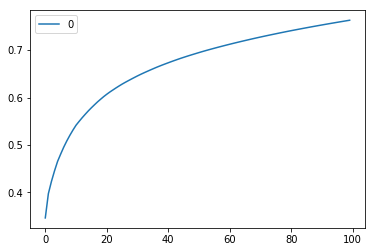

In [72]:
# Checking the number of components that help explain the variability in our data
var_exp = pca.explained_variance_ratio_
var_exp_df= pd.DataFrame(var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp_df = pd.DataFrame(cum_var_exp)
cum_var_exp_df[:100].plot()

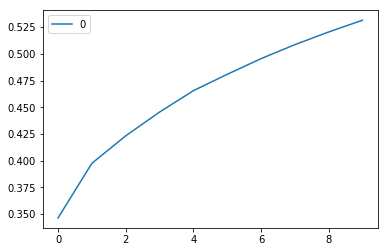

In [54]:
cum_var_exp_df[:10].plot() 

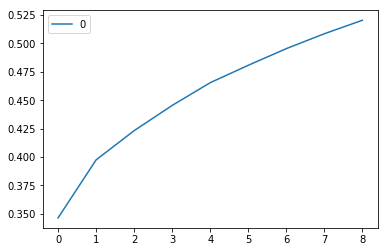

In [63]:
cum_var_exp_df[:9].plot() 

In [94]:
var_exp_df[:9]

,0
0,0.346434
1,0.051076
2,0.025736
3,0.022231
4,0.020007
5,0.015329
6,0.014664
7,0.013103
8,0.011882


In [92]:
xlabels = np.linspace(1,8,8)
xlabels

array([1., 2., 3., 4., 5., 6., 7., 8.])

<BarContainer object of 9 artists>

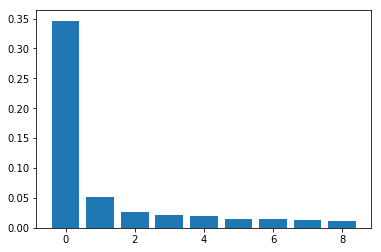

In [96]:
plt.bar( var_exp_df[:9].index, var_exp_df[:9][0])

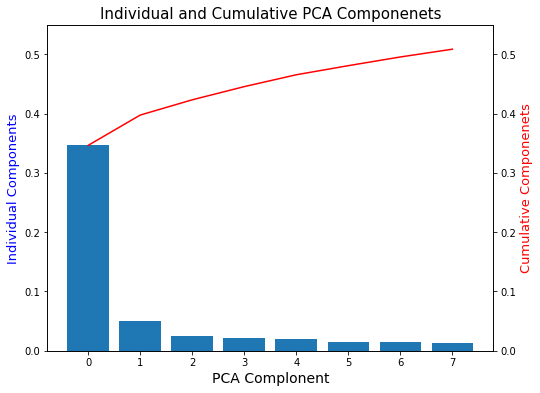

In [118]:
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1.bar( var_exp_df[:8].index, var_exp_df[:8][0])
ax1.set_xlabel('PCA Complonent', fontsize = 14)
ax1.set_ylabel('Individual Components', color='b', fontsize = 13)
ax1.set_ylim([0, .55])

ax2 = ax1.twinx()
ax2.plot(cum_var_exp_df[:8], color = 'r')
ax2.set_ylabel('Cumulative Componenets', fontsize = 13, color = 'r')
ax2.set_ylim([0, .55])


ax1.set_title('Individual and Cumulative PCA Componenets', fontsize = 15);

In [133]:
# Create a function to take in a PCA component dataframe and graph out its components 
# and check the top and bottom features of that component
def plotting_components(components, num_components, num_of_elements ):
    fig, ax = plt.subplots(nrows=num_components, ncols=1, figsize = (6, num_components* 5))
    ax = ax.ravel() 
    for i in range(1,num_components+1):
        ax[i-1].barh(
            components[components.index == f'component {i}'].T.sort_values(by= f'component {i}').head(num_of_elements).sort_values(by= f'component {i}').index,
            components[components.index == f'component {i}'].T.sort_values(by= f'component {i}').head(num_of_elements).sort_values(by= f'component {i}')[f'component {i}'])
        ax[i-1].barh(
             components[components.index == f'component {i}'].T.sort_values(by= f'component {i}', ascending = False).head(num_of_elements).sort_values(by= f'component {i}').index,
             components[components.index == f'component {i}'].T.sort_values(by= f'component {i}', ascending = False).head(num_of_elements).sort_values(by= f'component {i}')[f'component {i}'])
        ax[i-1].set_title(f'Component {i}')
    plt.savefig('images/PCA Componenets')
        








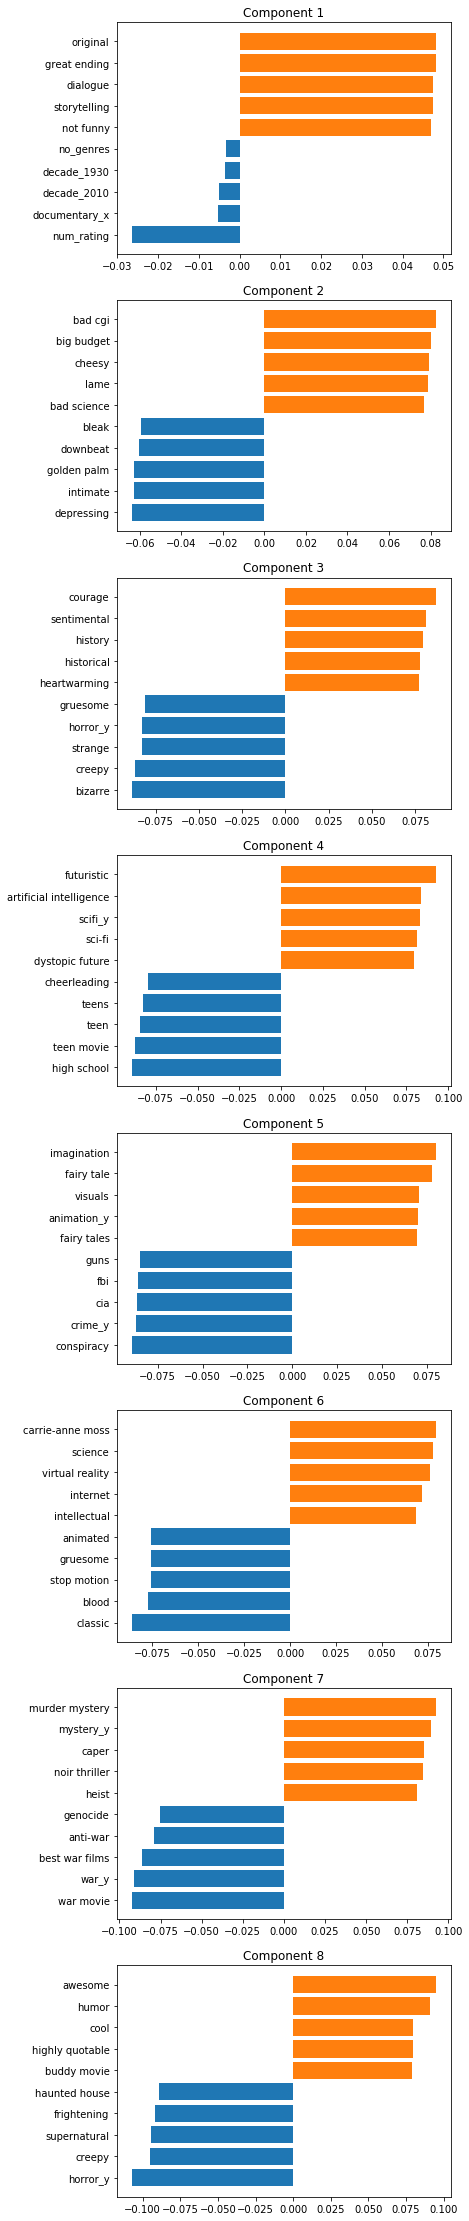

In [134]:
# Graphing top 5 and bottom 5 strongest features of top 8 components 
plotting_components(components, 8, 5)